# Week 2

## Part 1: A little visualization exercise
Start by downloading these four datasets: Data 1, Data 2, Data 3, and Data 4. The format is .tsv, which stands for tab separated values. As you will later realize, these are famous datasets! Each file has two columns (separated using the tab character). The first column is x
-values, and the second column is y
-values.

*Exercise:*

- Using the numpy function mean, calculate the mean of both x
-values and y
-values for each dataset.
- Use python string formatting to print precisely two decimal places of these results to the output cell. Check out this stackoverflow page for help with the string formatting.

In [1]:
%matplotlib inline
import numpy as np
import seaborn
seaborn.reset_orig()

import pandas as pd

dflist = [df1, df2, df3, df4] = pd.read_csv("../files/data1.tsv",  sep='\t', names=["x", "y"]), \
    pd.read_csv("../files/data2.tsv",  sep='\t', header = None, names=["x", "y"]), \
    pd.read_csv("../files/data3.tsv",  sep='\t', header = None, names=["x", "y"]), \
    pd.read_csv("../files/data4.tsv",  sep='\t', header = None, names=["x", "y"])

In [2]:
dflist[1]

,x,y
0,10,9.14
1,8,8.14
2,13,8.74
3,9,8.77
4,11,9.26
5,14,8.10
6,6,6.13
7,4,3.10
8,12,9.13
9,7,7.26


In [3]:
df2

,x,y
0,10,9.14
1,8,8.14
2,13,8.74
3,9,8.77
4,11,9.26
5,14,8.10
6,6,6.13
7,4,3.10
8,12,9.13
9,7,7.26


In [4]:
print(f"Means:")
i = 1
for df in dflist:
    print(f" df{i}: x: {np.mean(df['x']):.2f} y: {np.mean(df['y']):.2f}")
    i = i+1

Means:
 df1: x: 9.00 y: 7.50
 df2: x: 9.00 y: 7.50
 df3: x: 9.00 y: 7.50
 df4: x: 9.00 y: 7.50


- Now calculate the variance for all of the various sets of x- and y-values, by using the numpy function var. Print it to three decimal places.

In [5]:
print(f"Variance:")
i = 1
for df in dflist:
    print(f" df{i}: x: {np.var(df['x']):.3f} y: {np.var(df['y']):.3f}")
    i = i+1


Variance:
 df1: x: 10.000 y: 3.752
 df2: x: 10.000 y: 3.752
 df3: x: 10.000 y: 3.748
 df4: x: 10.000 y: 3.748


**Code Tutor**
Your approach to calculating the variance for each DataFrame in dflist is generally correct. However, there's a crucial detail about variance calculation in NumPy that might affect your results.

By default, np.var() calculates the variance using a denominator of N (the number of elements in the sample), which is known as the population variance. In many statistical contexts, especially when dealing with a sample of a larger population (like Anscombe's quartet), the sample variance is preferred. The sample variance uses N-1 in the denominator, which is an unbiased estimator of the population variance.

To calculate the sample variance, you should set the ddof (Delta Degrees of Freedom) parameter to 1 in np.var()

In [6]:
print(f"Variance:")
i = 1
for df in dflist:
    print(f" df{i}: x: {np.var(df['x'], ddof=1):.3f} y: {np.var(df['y'], ddof=1):.3f}")
    i = i+1


Variance:
 df1: x: 11.000 y: 4.127
 df2: x: 11.000 y: 4.128
 df3: x: 11.000 y: 4.123
 df4: x: 11.000 y: 4.123


- Use numpy to calculate the Pearson correlation between x- and y-values for all four data sets (also print to three decimal places).

In [7]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
i=0
pearsonlist = []

for df in dflist:
#    pearsonlist.append(np.corrcoef(df["x"], df["y"]))
    print(f"pearson correlation dataset {i+1}: \n  {np.corrcoef(df['x'], df['y'])}\n ")
    i = i + 1


pearson correlation dataset 1: 
  [[1.000 0.816]
 [0.816 1.000]]
 
pearson correlation dataset 2: 
  [[1.000 0.816]
 [0.816 1.000]]
 
pearson correlation dataset 3: 
  [[1.000 0.816]
 [0.816 1.000]]
 
pearson correlation dataset 4: 
  [[1.000 0.817]
 [0.817 1.000]]
 


- The next step is use linear regression to fit a straight line f(x)=ax+b through each dataset and report a and b
 (to two decimal places). An easy way to fit a straight line in Python is using scipy's linregress. It works like this:

```
from scipy import stats
slope1, intercept1, r_value1, p_valu1e, std_err1 = stats.linregress(df1["x"], df1["y"])
````


In [8]:
from scipy import stats
regression_results = []
i = 0

for df in dflist:
    i = i + 1
    slope, intercept, r_value, p_value, std_err = stats.linregress(df["x"], df["y"])
#   print(f"Slope: {slope:.3f}, Intercept: {intercept:.3f}, R-value: {r_value:.3f}, P-value: {p_value:.3f}, Std Err: {std_err:.3f}")
    print(f"f{i}(x) = ax+b = {slope:.2f}x + {intercept:.2f} \n")
    
    regression_results.append((slope, intercept))


f1(x) = ax+b = 0.50x + 3.00 

f2(x) = ax+b = 0.50x + 3.00 

f3(x) = ax+b = 0.50x + 3.00 

f4(x) = ax+b = 0.50x + 3.00 



- Comment on the results from the previous steps. What do you observe?

Observations:
- Even though the data differs, they have same means, and almost same variance
- Pearsom correlation between x and y also seems the same
- They can all be fitted to same line in linear regression

Finally, it's time to plot the four datasets using matplotlib.pyplot. Use a two-by-two subplot to put all of the plots nicely in a grid and use the same x
 and y
 range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version here.)


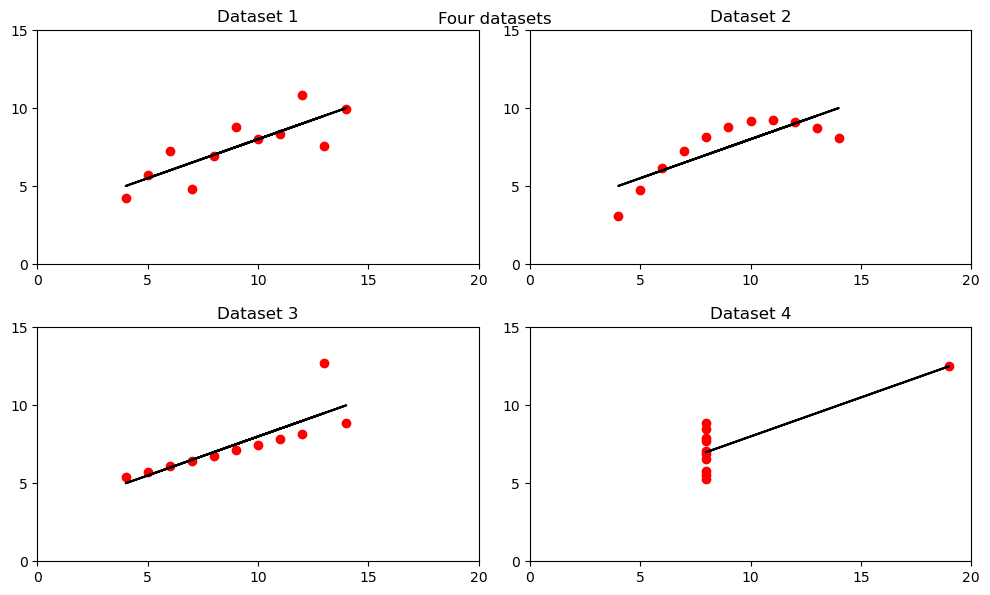

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#define subplot layout - 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6)) # Adjust figsize as needed , figsize=(8, 16)
fig.suptitle("Four datasets")

plt.title("Plots of the four datasets")

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a colormap
# Matplotlib has several built-in colormaps like viridis, plasma, inferno, magma, etc.
#colors = cm.copper(np.linspace(0, 1, num_plots))

i=0
for ax, df, (a, b) in zip(axes, dflist, regression_results):
    i = i + 1
    ds = "Dataset " + str(i)
    ax.scatter(df["x"], df["y"], color="red")
    ax.set_title(ds, size=12)
    ax.set_xlim(0,20)
    ax.set_ylim(0,15)
    ax.set_xticks(range(0,21,5))
    ax.set_yticks(range(0,16,5))

    reg_line = a * df["x"] + b
    ax.plot(df["x"], reg_line, color="black")  # Change color as needed

    
# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95) # Adjust as needed for the main title
plt.show()


Lesson learned: You cannot always interpret what type of data we have (the behaiour and predictions), by just looking at the mean, the variance, pearson correlation and linear fit. 

We might look for outliers, bias, perhaps better fits (such as polynomial) ...

Therefore: always plot your data when possible! 

**Excercise: Questions for the lecture**

**Q: What is the difference between data and metadata? How does that relate to the GPS tracks-example?**

- *metadata is data about the data that we are interested it.*


**Q: Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.**

- *It is, when it has to do with an overall view and it is in the right size, or the sizes don't vary in extreemes. For example it is almost impossible to visualise a model of the solar system that is true to size and diatances.*

**Q: Simpson's paradox is hard to explain. Come up with your own example - or find one on line.**
- *In a periodic table, nobel gasses will have different trends in bonding with other elements ... I dunno.*
- *Humans in different social group or geographics can have differend trends for when they get kids, how many kids, level of education etc*

**Q: In your own words, explain the differnece between exploratory and explanatory data analysis.**
- *Exploratory: We look at data exploratory to find patterns and trends and what to look for further.*
- *Explanatory: We have some data and perhaps see some trends or patterns that we want to explain*

## Part 2: Visualizing patterns in the data
Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify.

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

In [10]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

Exercise: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day.

**Note:** restrict yourself to the dataset of entire years.

- Weekly patterns. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Here's what my version looks like. Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?
- The months. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
- The 24 hour cycle. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.
- Hours of the week. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

In [11]:
#import import_ipynb
#import Ex1

**Nah ... se Ex1 / week1 for Part 2**

[Se week 1](./Ex1.ipynb)

## Part 3: Creating nice plots

**Nice plots:**
- subplots instead of long list of plots
- space - search for tight layout matplotlib - better for showing on a page
- Axes 1: LABELS!!
- Axes 2: name them, but also, and give them values that makes sense
- Axes 3: Zoom level - show the entire range of an axes if it makes sense, not just auto-zoom in. 
- - zoom level in subplots - comparable axes
- don't show more than neseccary for data. Data-ink ratio (less is more)
- Maybe change font from the original DejaVu Sans
- Captions!
- (and the 10th: there are always exceptions to the rules)

##  Part 4: Exploring other types of plots for temporal data
 